In [4]:
import numpy as np
import pandas as pd

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('max_columns', None)

# Matplotlib overview

In [5]:
import matplotlib.pyplot as plt

In [6]:
# 따로 그림 보여달라 안해도 자동으로 보여지도록
%matplotlib inline

In [7]:
# 하나의 셀 안의 여러개 구문이 출력되도록
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

![](https://matplotlib.org/_images/anatomy.png)

##### ![](https://static.packt-cdn.com/products/9781784393878/graphics/9ec8935e-0bdc-46aa-b392-18c5431a2218.png)

- 출처
    - https://matplotlib.org
    - https://subscription.packtpub.com/book/data/9781784393878/11/ch11lvl1sec112/getting-started-with-matplotlib

- 2가지 구성요소
    - Figure 
        - 틀
    - Axes 
        - Figure 바로 아래에, 실제 그래프가 그려질 공간
        - 실제로 가장 많이 사용할 요소
            - 이 안에 각종 plotting components가 존재  


# Matplotlib의 2가지 인터페이스

- Matplotlib이 배우고 익히기 어려운 이유 중 하나

In [8]:
import FinanceDataReader as fdr

samsung_df = fdr.DataReader('005390', '2017-01-01', '2017-12-31')
samsung_df.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2017-01-02,1260,1300,1255,1295,1232965,0.040
2017-01-03,1305,1315,1280,1310,886559,0.012
2017-01-04,1305,1310,1280,1305,446070,-0.004
2017-01-05,1305,1330,1300,1320,721691,0.011
2017-01-06,1320,1345,1305,1325,645608,0.004


## Stateful

- Matplotlib이 암묵적으로 현재 상태를 들고 있음
    - 내부적으로 현재 타겟이 되는 figure, ax 등을 설정하고, operation이 발생하면 '내부에서' 해당 figure,ax에 적용함
- 사용은 비추
    - matplotlib이 암묵적, 내부적으로 변화를 진행하고 적용하기 때문에, 직관적이지 못함
    - 다수의 plot을 한번에 그리기 어려움
    - 그냥 간단히 테스트 해볼 때 정도에만 사용

In [9]:
x = [1,2,3]
y = [4,5,6]

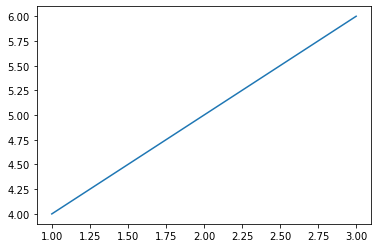

In [10]:
something = plt.plot(x, y)
# plt.show() -> matplotlib inline magic command를 실행하지 않았으면, 항상 필요!

In [11]:
something

In [12]:
type(something)

list

In [13]:
type(something[0])

matplotlib.lines.Line2D

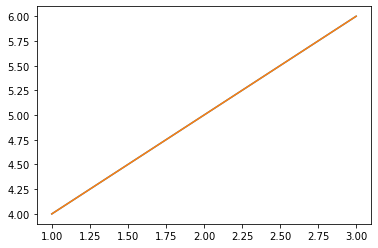

In [14]:
# 딱 그래프만 출력이 되게하고, return이 되는 list는 안보이게 만드는 방법
_ = plt.plot(x, y)
plt.plot(x, y);

- 예제1

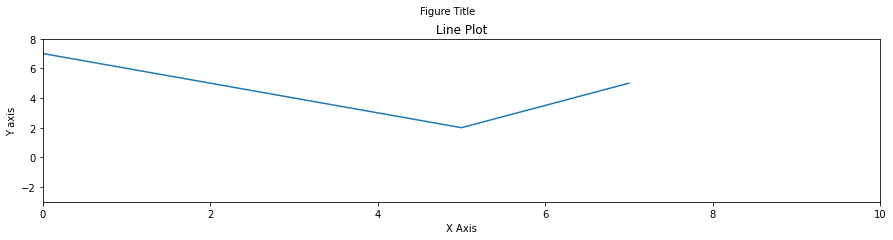

In [15]:
x = [-3, 5, 7]
y = [10, 2, 5]

plt.figure(figsize=(15, 3));

plt.plot(x, y);

plt.xlim(0, 10);
plt.ylim(-3, 8);
plt.xlabel('X Axis');
plt.ylabel('Y axis');
plt.title('Line Plot');
plt.suptitle('Figure Title', size=10, y=1.03);  # multi-plot할 때 유용

- 예제2

In [16]:
samsung_df.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2017-01-02,1260,1300,1255,1295,1232965,0.040
2017-01-03,1305,1315,1280,1310,886559,0.012
2017-01-04,1305,1310,1280,1305,446070,-0.004
2017-01-05,1305,1330,1300,1320,721691,0.011
2017-01-06,1320,1345,1305,1325,645608,0.004


pandas.core.indexes.datetimes.DatetimeIndex

pandas.core.series.Series

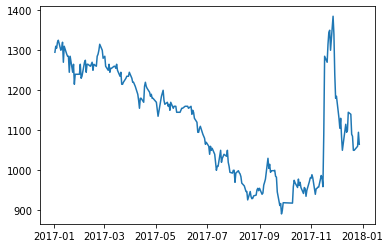

In [17]:
type(samsung_df.index)
type(samsung_df['Close'])
plt.plot(
    samsung_df.index,
    samsung_df['Close']
)

## Stateless(or object-oriented)

- Matplotlib의 각 component를 하나의 object로 받아서, 함수 실행 및 property 설정/변경
    - figure, ax(es)를 먼저 생성한다음, 하나하나 더하고, 적용하는 식
- 적용과정이 명시적으로 코드로 드러나기 때문에 조금 더 직관적임
 

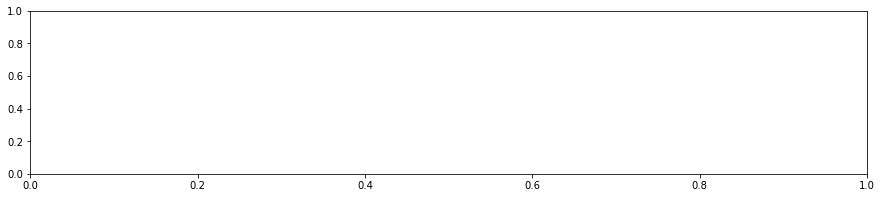

In [18]:
x = [-3, 5, 7]
y = [10, 2, 5]

fig, ax = plt.subplots(figsize=(15, 3))

In [19]:
type(fig)
type(ax)

matplotlib.figure.Figure

matplotlib.axes._subplots.AxesSubplot

In [20]:
ax.plot(x, y);  # stateful에서는 plt를 이용했지만 stateless에서는 ax를 이용
ax.set_xlim(0, 10);  # set_로 설정하도록 함
ax.set_ylim(-3, 8);
ax.set_xlabel('X axis');
ax.set_ylabel('Y axis');
ax.set_title('Line Plot');
fig.suptitle('Figure Title', size=10, y=1.03);

In [21]:
# fig

- 한번에 시각화 그래프가 나오게 하기

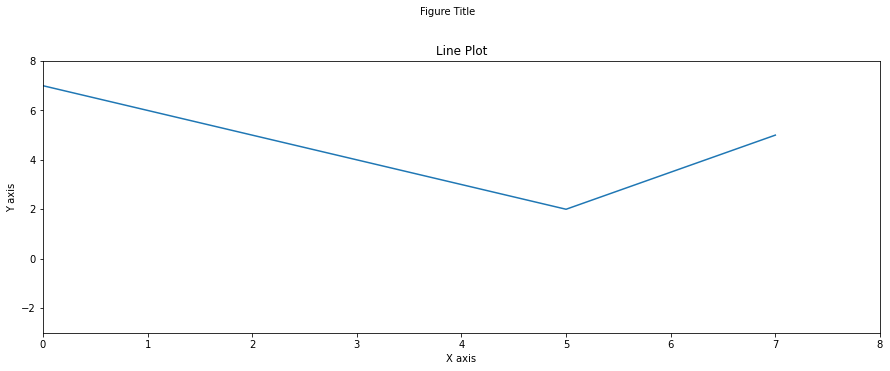

In [22]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(x, y);
ax.set_xlim(0, 8);
ax.set_ylim(-3, 8);
ax.set_xlabel('X axis');
ax.set_ylabel('Y axis');
ax.set_title('Line Plot');
fig.suptitle('Figure Title', size=10, y=1.03);

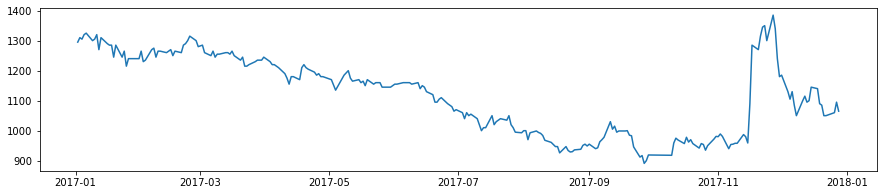

In [23]:
fig, ax = plt.subplots(figsize=(15, 3))
ax.plot(samsung_df.index, samsung_df['Close'])

-> OOP 방식으로 익히는 것이 확장성 및 추후 새로운 visualization lib에 대해 익힐 때 더 도움이 많이 됨!

# Matplotlib components에 대해 조금 더 깊게 들여다보기

## figure, axes

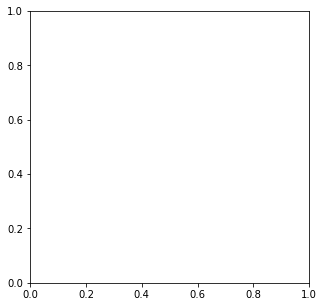

In [24]:
fig, ax = plt.subplots(figsize=(5, 5))

In [25]:
ax

<AxesSubplot:>

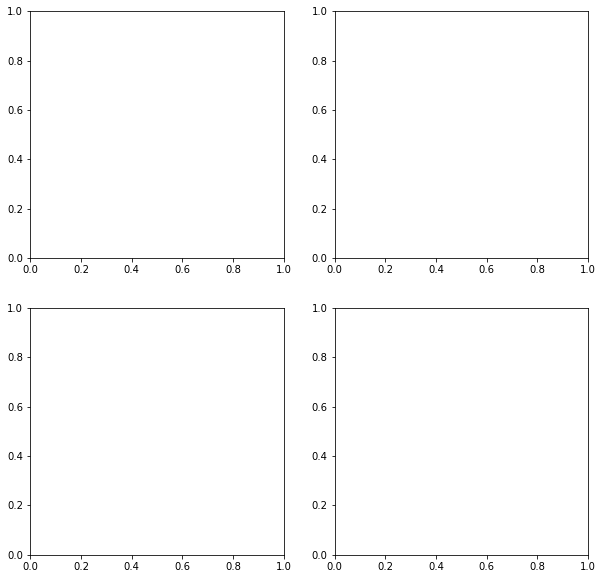

In [26]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

In [27]:
type(fig)
type(axes)   # 2차원 array (행렬형태) 멀티플랏일땐 axes로 많이 받음

matplotlib.figure.Figure

numpy.ndarray

In [28]:
axes[0][0]   # 2차원 array에 대한 indexing으로 target ax에 접근

<AxesSubplot:>

- nrows or ncols가 1보다 크면, `ax`의 type은 `AxesSubplot`가 아니라 numpy array of `AxesSubplot` 


## Children of ax(es)

In [29]:
axes[0][0].get_children()

 Text(0.5, 1.0, ''),
 Text(0.0, 1.0, ''),
 Text(1.0, 1.0, ''),

- `spines`: axes를 둘러싸고 있는 border
- `axis`: x,y축
    - `ticks`, `labels` 등을 가지고 있음

- `axis`
    - **Tip: get/set 관련 함수들을 잘 이용하기**

In [30]:
ax = axes[0][0]

In [31]:
ax.xaxis

In [32]:
# get_xaxis() 메소드 내부에는 `return self.xaxis` 와 같이 구현이 되어있습니다.
ax.get_xaxis()

In [33]:
ax.xaxis == ax.get_xaxis()

True

## 예제

In [34]:
data = fdr.DataReader("005930", start="2019-01-01", end="2020-01-01")
close_series = data['Close']
volume_series = data['Volume']

In [35]:
close_series.head()
volume_series.head()

Date
2019-01-02    38750
2019-01-03    37600
2019-01-04    37450
2019-01-07    38750
2019-01-08    38100
Name: Close, dtype: int64

Date
2019-01-02     7847664
2019-01-03    12471493
2019-01-04    14108958
2019-01-07    12748997
2019-01-08    12756554
Name: Volume, dtype: int64

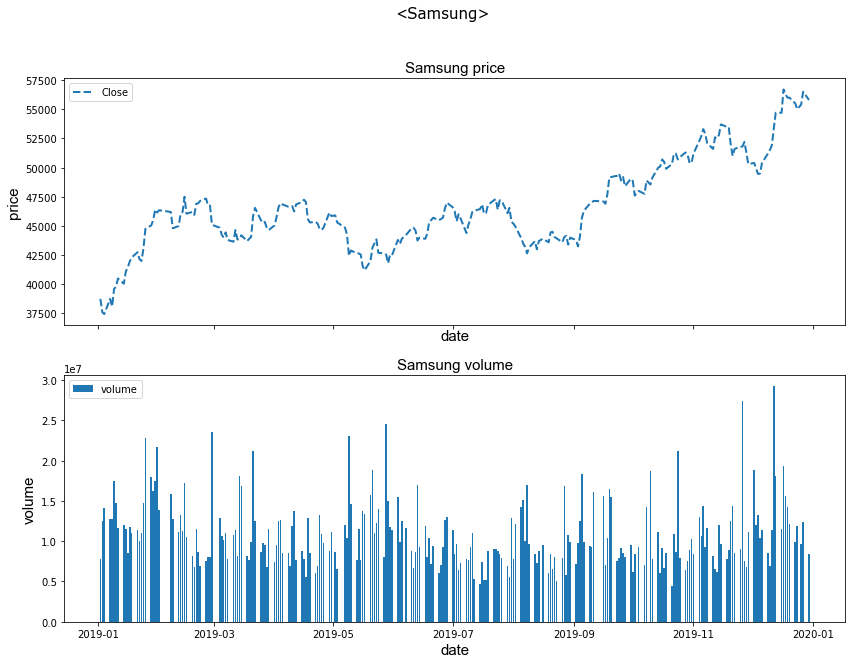

In [36]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(14,10), sharex=True)  # sharex=True: X axis를 공유한다
ax1 = axes[0]
ax2 = axes[1]

# ax1
ax1.plot(close_series.index, close_series, linewidth=2, linestyle='--', label="Close");  # label: legend에 표시할 이름
_ = ax1.set_title('Samsung price', fontsize=15, family='Arial');
_ = ax1.set_ylabel('price', fontsize=15, family='Arial');
_ = ax1.set_xlabel("date", fontsize=15, family='Arial');
ax1.legend(loc="upper left");

# ax2
ax2.bar(volume_series.index, volume_series, label="volume")
# ax2.bar(volume_series.index, volume_series, label="volume");  # ax2.plot(kind='bar')와 같아짐
_ = ax2.set_title('Samsung volume', fontsize=15, family='Arial');
_ = ax2.set_ylabel('volume', fontsize=15, family='Arial');
_ = ax2.set_xlabel("date", fontsize=15, family='Arial');
ax2.legend(loc="upper left");

fig.suptitle("<Samsung>", fontsize=15, family='Verdana');

- 참고

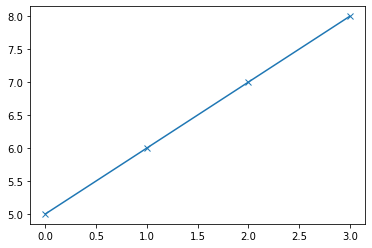

In [37]:
fig, ax = plt.subplots()
ax.plot([5,6,7,8], marker='x')  # default x는 default index [0,1,2,3]으로 적용

# Plotting with Pandas 

- DataFrame, Series는 `plot()`을 호출하면, 내부적으로 matplotlib api를 호출함
- plot을 시행한 후 `ax`를 return함
- matplotlib arg는 그대로 전달 가능
- plot의 종류(`kind` arg)
    - `bar, line, scatter`, etc
    - `hist, box`, etc

In [58]:
import FinanceDataReader as fdr

In [59]:
samsung_series = fdr.DataReader("005930", "2017-01-01", "2018-01-01")['Close']
kodex_series = fdr.DataReader("069500", "2017-01-01", "2018-01-01")['Close']

In [60]:
price_df = pd.concat([samsung_series, kodex_series], axis=1)
price_df.columns = ["삼성전자", "KODEX 200"]
price_df.head()

,삼성전자,KODEX 200
Date,,
2017-01-02,36100,23828
2017-01-03,36480,24018
2017-01-04,36160,24046
2017-01-05,35560,23951
2017-01-06,36200,24054


In [41]:
price_max_df = price_df.groupby(price_df.index.month).max()
price_max_df.head()
# price_max_df.shape

,삼성전자,KODEX 200
Date,,
1,39900,24708
2,39560,24942
3,42560,25923
4,44620,26362
5,47020,28264


<AxesSubplot:xlabel='Date'>

C:\Users\juhye\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49340 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\juhye\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\juhye\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\juhye\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\juhye\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 49340 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\juhye\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 49457 missing from cur

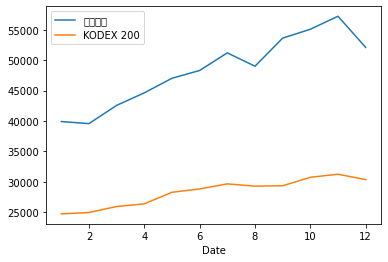

In [42]:
# Series 혹은 DataFrame 변수에 대해 plot()함수만 호출하면 기본적인 plotting이 진행됨
# plot()은 변수 초기화안하면 ax를 return함
price_max_df.plot()

- 미리 설정한 fig, ax에 대해 plotting하기 

C:\Users\juhye\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49340 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\juhye\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\juhye\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\juhye\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\juhye\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 49340 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\juhye\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 49457 missing from cur

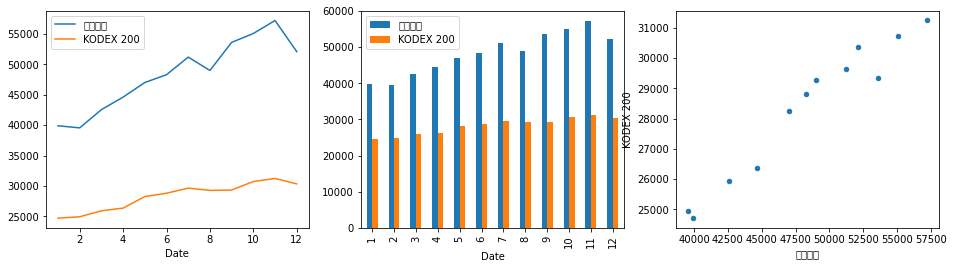

In [43]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 4))
    
price_max_df.plot(ax=ax1, kind='line');  # ax= plot할 axes
price_max_df.plot(ax=ax2, kind='bar');
price_max_df.plot(ax=ax3, x='삼성전자', y='KODEX 200', kind='scatter');

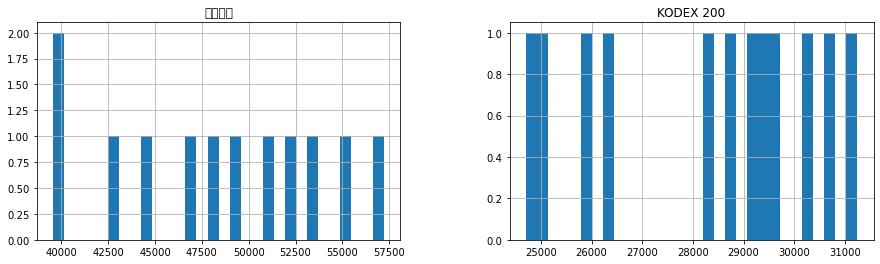

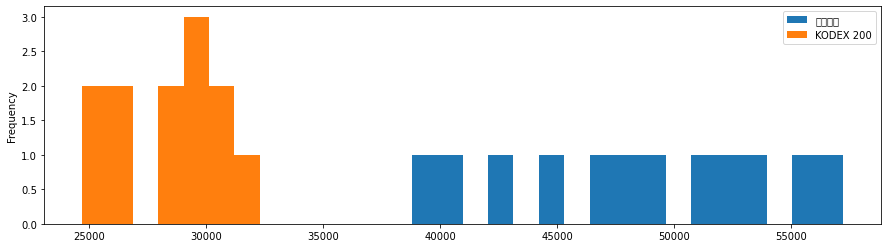

In [44]:
price_max_df.hist(figsize=(15, 4), bins=30);  # hist: 히스토그램. 데이터 수만큼 ax를 만들어서 subplot으로 만듦
price_max_df.plot.hist(figsize=(15, 4), bins=30); #plot(kind="hist")도 동일한 형태로 하나에 plot함

In [45]:
price_df.pct_change() # => p2/p1 - 1

,삼성전자,KODEX 200
Date,,
2017-01-02,NaN,NaN
2017-01-03,0.011,0.008
2017-01-04,-0.009,0.001
2017-01-05,-0.017,-0.004
2017-01-06,0.018,0.004
...,...,...
2017-12-21,-0.034,-0.019
2017-12-22,0.011,0.005
2017-12-26,-0.030,-0.004


C:\Users\juhye\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49340 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\juhye\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\juhye\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\juhye\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\juhye\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 49340 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\juhye\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 49457 missing from cur

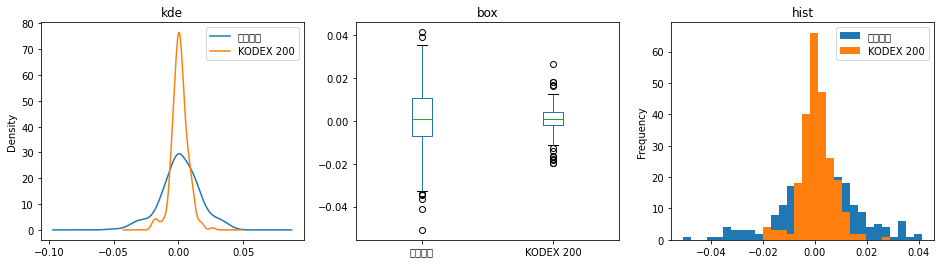

In [46]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,4))

price_df.pct_change().plot(kind='kde', ax=ax1, title='kde');
price_df.pct_change().plot(kind='box', ax=ax2, title='box');
price_df.pct_change().plot(kind='hist', ax=ax3, title='hist', bins=30);  # bins는 구간을 몇개로 쪼개느냐를 의미

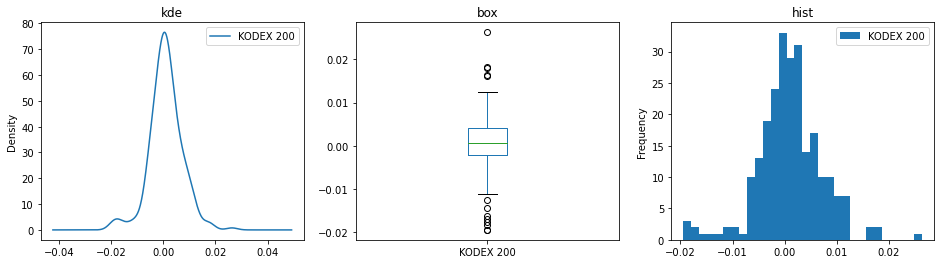

In [47]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,4))

# "kde", "box", "hist"는 x축을 지정하는 그래프 형태가 아니기 때문에 x는 plot할 데이터(column)를 의미

price_df.pct_change().plot(x="삼성전자", kind='kde', ax=ax1, title='kde');
price_df.pct_change().plot(x="삼성전자", kind='box', ax=ax2, title='box');
price_df.pct_change().plot(x="삼성전자", kind='hist', ax=ax3, title='hist', bins=30);

- 한글 Font 가능하게
    - Google에 "matplotlib 한글" or "matplotlib 한글 windows" 이라고 검색
    - Window: https://financedata.github.io/posts/matplotlib-hangul-for-windows-anaconda.html
    - Mac OS / Linux : http://corazzon.github.io/matplotlib_font_setting
    - https://programmers.co.kr/learn/courses/21/lessons/950 등등

In [48]:
import matplotlib.font_manager as fm

In [49]:
for f in fm.fontManager.ttflist:
    if 'Gothic' in f.name:
        print((f.name, f.fname))

('NanumGothic', 'C:\\Users\\juhye\\anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\NanumGothicLight.ttf')
('NanumGothic', 'C:\\Users\\juhye\\anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\NanumGothicBold.ttf')
('NanumGothic', 'C:\\Users\\juhye\\anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\NanumGothic.ttf')
('NanumGothic', 'C:\\Users\\juhye\\anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\NanumGothicExtraBold.ttf')
('Malgun Gothic', 'C:\\WINDOWS\\Fonts\\malgun.ttf')
('Century Gothic', 'C:\\Windows\\Fonts\\GOTHICBI.TTF')
('Franklin Gothic Medium Cond', 'C:\\WINDOWS\\Fonts\\FRAMDCN.TTF')
('Century Gothic', 'C:\\WINDOWS\\Fonts\\GOTHICB.TTF')
('Century Gothic', 'C:\\Windows\\Fonts\\GOTHICI.TTF')
('Century Gothic', 'C:\\WINDOWS\\Fonts\\GOTHICI.TTF')
('HYGothic-Medium', 'C:\\WINDOWS\\Fonts\\H2GTRM.TTF')
('Hancom Gothic', 'C:\\WINDOWS\\Fonts\\Hancom Gothic Bold.ttf')
('Yu Gothic', 'C:\\WINDOWS\\Fonts\\YuGothR.ttc')
('Malgu

In [50]:
plt.rcParams["font.family"] = 'AppleGothic'

findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.
C:\Users\juhye\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49340 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\juhye\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\juhye\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\juhye\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\juhye\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 49340 missing from current font.
  font

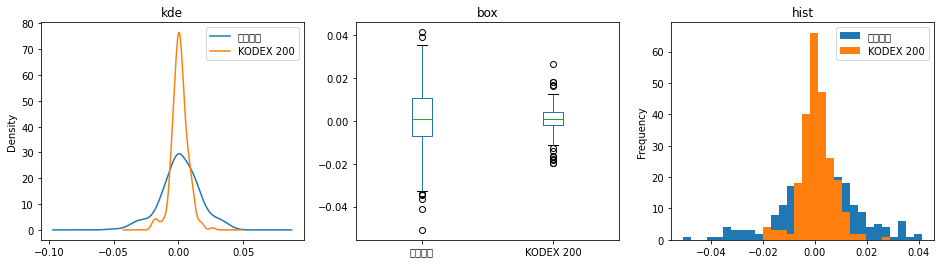

In [51]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,4))

price_df.pct_change().plot(kind='kde', ax=ax1, title='kde');
price_df.pct_change().plot(kind='box', ax=ax2, title='box');
price_df.pct_change().plot(kind='hist', ax=ax3, title='hist', bins=30);

In [52]:
import platform
platform.platform()

'Windows-10-10.0.19041-SP0'

In [53]:
import sys
sys.version_info

sys.version_info(major=3, minor=8, micro=8, releaselevel='final', serial=0)

In [54]:
import matplotlib

print ('버전: ', matplotlib.__version__)
print ('설치위치: ', matplotlib.__file__)
print ('설정: ', matplotlib.get_configdir())
print ('캐시: ', matplotlib.get_cachedir())

버전:  3.3.4
설치위치:  C:\Users\juhye\anaconda3\lib\site-packages\matplotlib\__init__.py
설정:  C:\Users\juhye\.matplotlib
캐시:  C:\Users\juhye\.matplotlib


In [55]:
import numpy as np
data = np.random.randint(-100, 100, 50).cumsum()
data

array([  96,  171,   90,   -3,  -96, -113, -104, -122,  -73, -167, -168,
       -145, -106, -114, -159,  -60, -137, -230, -287, -189, -246, -196,
       -248, -150, -196, -191, -145, -104, -137, -229, -168, -237, -204,
       -213, -125,  -96, -119, -173,  -91,  -14,   -6,   68,   95,  143,
        105,   17,  -20,  -62, -154, -230], dtype=int32)

In [56]:
from matplotlib import font_manager

font_fname = 'C:/Users/juhye/anaconda3/Lib/site-packages/matplotlib/mpl-data/fonts/ttf/NanumGothicBold.ttf'
font_family = font_manager.FontProperties(fname=font_fname).get_name()

plt.rcParams["font.family"] = font_family

In [57]:
font_list = font_manager.findSystemFonts(fontpaths=None, fontext='ttf')

print('사용가능한 TTF 폰트 개수:', len(font_list))
cond = font_list == 
font_list[:10] # 목록에서 처음 10 개만 보기

SyntaxError: invalid syntax (<ipython-input-57-75d9cfbc60cf>, line 4)

In [ ]:
import matplotlib as mpl
print(mpl.get_cachedir())

In [ ]:
plt.plot(range(50), data, 'r')
plt.title('가격변동 추이',fontproperties=fontprop)
plt.ylabel('가격')

In [ ]:
import matplotlib.font_manager as fm

font_path = 'C:/Users/juhye/anaconda3/Lib/site-packages/matplotlib/mpl-data/fonts/ttf/NanumGothicBold.ttf'
fontprop = fm.FontProperties(fname=font_path, size=18)

plt.ylabel('가격', fontproperties=fontprop)
plt.title('가격변동 추이', fontproperties=fontprop)
plt.plot(range(50), data, 'r')
plt.show()

- minus가 깨지는 경우 해결법

In [ ]:
import matplotlib as mpl

mpl.rcParams['axes.unicode_minus'] = False

matplotlib minus problem mac os

# Seaborn 

In [ ]:
!pip install seaborn==0.9.0

In [ ]:
import seaborn as sns

In [ ]:
df = pd.read_csv("my_data/Small_and_Big.csv", index_col=0, parse_dates=["date"])
df.head()

In [ ]:
median_df = df.groupby(['date']).agg({'시가총액 (보통)(평균)(원)': 'median'})
median_df.columns = ["median_시가총액"]
median_df.head()

In [ ]:
df = df.join(median_df, on="date")

In [ ]:
df.loc[df['시가총액 (보통)(평균)(원)'] < df['median_시가총액'], "size"] = "small"
df.loc[df['시가총액 (보통)(평균)(원)'] >= df['median_시가총액'], "size"] = "big"

In [ ]:
df.head()

## Count plot

### matplotlib version

In [ ]:
df['size'].value_counts()

In [ ]:
df['size'].value_counts().plot(kind='bar');

In [ ]:
df['size'].hist()

### seaborn version

In [ ]:
sns.countplot(x="size", data=df)

## 수익률 bar plot

In [ ]:
df.shape

In [ ]:
# 데이터 사이즈 줄이기
df = df[df['date'] >= "2017-01-01"]

In [ ]:
df.shape

In [ ]:
df.head()

### matplotlib version 

In [ ]:
df.groupby(['date'])['수익률(%)'].mean()

In [ ]:
df.groupby(['date'])['수익률(%)'].mean().plot(kind='bar', figsize=(18, 3))

In [ ]:
# 날짜 x tick label을 조금더 심플하게 나타나도록 만들기: DateTime object -> 문자열 object로 변환
df['date'] = df['date'].dt.strftime("%Y-%m-%d")   # %Y, %m 등과 같은 표현에 대해서 조금더 자세하게 알고 싶으신 분은 구글에 python datetime format으로 검색해보세요!

In [ ]:
# datetime 
# strftime
# strptime

In [ ]:
df.groupby(['date'])['수익률(%)'].mean().plot(kind='bar', figsize=(18, 3))

### seaborn version 

In [ ]:
sns.barplot(data=df, x="date", y="수익률(%)")

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(18, 3))
ax = sns.barplot(data=df, x="date", y="수익률(%)", ax=ax);

- x tick label을 45도 돌리기

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(18, 3))
ax = sns.barplot(data=df, x="date", y="수익률(%)", ax=ax);

current_x_tick_label = ax.get_xticklabels()
ax.set_xticklabels(current_x_tick_label, rotation=45);

- hue 넣기

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(18, 3))
sns.barplot(data=df, x="date", y="수익률(%)", ax=ax, hue="size")

current_x_tick_label = ax.get_xticklabels()
ax.set_xticklabels(current_x_tick_label, rotation=45);

## relation plot (다차원 그래프)

In [ ]:
df.head(2)

In [ ]:
sns.relplot(
    x="PBR(IFRS-연결)",
    y="수익률(%)",
    col="size",
    hue="베타 (M,5Yr)",
    data=df,
    
    palette="coolwarm",
)

In [ ]:
with sns.plotting_context("notebook", font_scale=1.2):
    sns.relplot(
        x="PBR(IFRS-연결)",
        y="수익률(%)",
        col="size",
        hue="베타 (M,5Yr)",
        palette="coolwarm",
        data=df
    )

In [ ]:
with sns.plotting_context("notebook", font_scale=1.2):
    sns.relplot(
        x="PBR(IFRS-연결)",
        y="수익률(%)",
        size="size",           # `col` 대신 `size`사용
        hue="베타 (M,5Yr)",
        palette="coolwarm",
        data=df
    )

# 실전예제 

In [ ]:
df_list = []
for i in range(2015, 2018):
    df_list.append(
        pd.read_csv("my_data/naver_finance/{}_12.csv".format(i))
    )

In [ ]:
df = pd.concat(df_list)

In [ ]:
df.head()

In [ ]:
df = df.dropna()

In [ ]:
df['rtn'] = df['price2'] / df['price'] - 1

In [ ]:
#
# outlier(이상치) 제거하기
#
for col in df.columns:
    if col not in ['ticker', 'price2', 'price', 'rtn']:
        mu = df[col].mean()
        std = df[col].std()
        
        cond1 = mu - 2*std <= df[col]
        cond2 = df[col] <= mu + 2*std
        
        df = df[cond1 & cond2]

In [ ]:
# with sns.plotting_context("notebook", font_scale=1.2):
sns.relplot(
    x="순이익률(%)",
    y="rtn",
    hue="ROA(%)",
    palette="coolwarm",
    data=df
)

In [ ]:
# with sns.plotting_context("notebook", font_scale=1.2):
sns.relplot(
    x="PSR(배)",
    y="rtn",
    hue="당기순이익(억원)",
    palette="coolwarm",
    data=df
)

- Seaborn plot 종류
    - https://seaborn.pydata.org/examples/index.html